# Descubrimientos de patrones de accidentes de tránsito en la CDMX

### Visualización de resultados

In [1]:
from math import radians, cos, sin, asin, sqrt, atan2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import rcParams
import seaborn as sns
import folium
import networkx as nx
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString, MultiLineString
import shapefile as shp
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)

In [11]:
road_hex100 = gpd.read_file('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1//shp_b//processed_data//hex_roads//road_hex100.shp')
roads_car = gpd.read_file('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1//shp_b//processed_data//shp_OSM//roads.shp')
train100 = pd.read_csv('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/final_datasets/train100_fin.csv', sep = ',',index_col = False)
test100 = pd.read_csv('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/final_datasets/test100_fin.csv', sep = ',',index_col = False)
results = pd.read_csv('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/final_datasets/results_pred.csv', sep = ',',index_col = False)
alcaldias = gpd.read_file('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1//shp_b//original_data//alcaldias_cdmx//alcaldias.shp')
alcaldias.replace([
                   'CuauhtÃ©moc', 
                   'Ã\x81lvaro ObregÃ³n', 
                   'Xochimilco', 
                   'TlÃ¡huac',
                   'Benito JuÃ¡rez', 
                   'Cuajimalpa de Morelos', 
                   'Gustavo A. Madero',
                   'Tlalpan', 
                   'Venustiano Carranza', 
                   'Azcapotzalco', 
                   'Iztapalapa',
                   'Iztacalco', 
                   'Miguel Hidalgo', 
                   'La Magdalena Contreras',
                   'CoyoacÃ¡n', 
                   'Milpa Alta'],
                  [
                   'Cuauhtemoc',
                   'Alvaro Obregon',
                   'Xochimilco',
                   'Tlahuac',
                   'Benito Juarez',
                   'Cuajimalpa de Morelos',
                   'Gustavo A. Madero',
                   'Tlalpan',
                   'Venustiano Carranza',
                   'Azcapotzalco',
                   'Iztapalapa',
                   'Iztacalco',
                   'Miguel Hidalgo',
                   'La Magdalena Contreras',
                   'Coyoacan',
                   'Milpa Alta'], inplace = True)

alcaldias = alcaldias[['nomgeo','geometry']]

In [3]:
results.head()

,prediccion,prob0,prob1,actual
0,0,1.0,0.0,0
1,0,1.0,0.0,0
2,0,1.0,0.0,0
3,0,1.0,0.0,0
4,0,1.0,0.0,0


In [4]:
results['X'] = train100['X']
results['Y'] = train100['Y']

In [5]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(results['X'], results['Y'])]
results = results.drop(['X','Y'], axis = 1)
crs = {'init':'epsg:4326'}
gdf = GeoDataFrame(results, crs = crs, geometry = geometry)

In [6]:
gdf_clean = gdf[gdf.geometry.type =='Point']

In [7]:
real = gdf_clean[gdf_clean['actual']==1]
pred = gdf_clean[gdf_clean['prediccion']==1]

(19.35, 19.41)

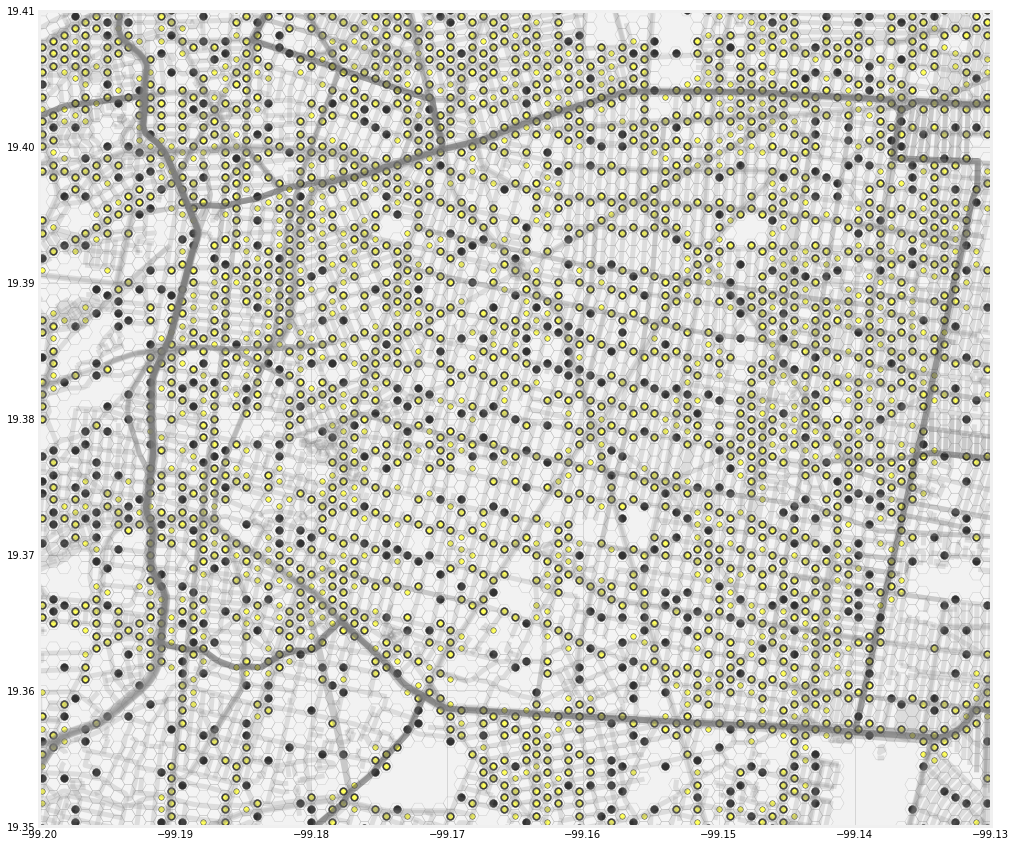

In [13]:
fig, ax = plt.subplots(figsize=(20, 15))
road_hex100.plot(ax = ax, alpha = 0.2, edgecolor = 'black', color = 'white')
roads_car.plot(ax = ax, alpha = 0.2,linewidth = 5, color = 'gray')
real.plot(ax = ax, color = 'black',alpha = 1,edgecolor = 'black', markersize = 60)
pred.plot(ax = ax, color = '#ffff33', alpha = 1,edgecolor = 'black',markersize = 30)
alcaldias.plot(ax = ax, alpha = 0.2, linewidth = 6, edgecolor = 'black', color = 'white')
ax.set_xlim(-99.2, -99.13)
ax.set_ylim(19.35, 19.41)
#fig.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/final_datasets/por_hora_año_li.png', format = 'png', dpi = 200, bbox_inches = 'tight')


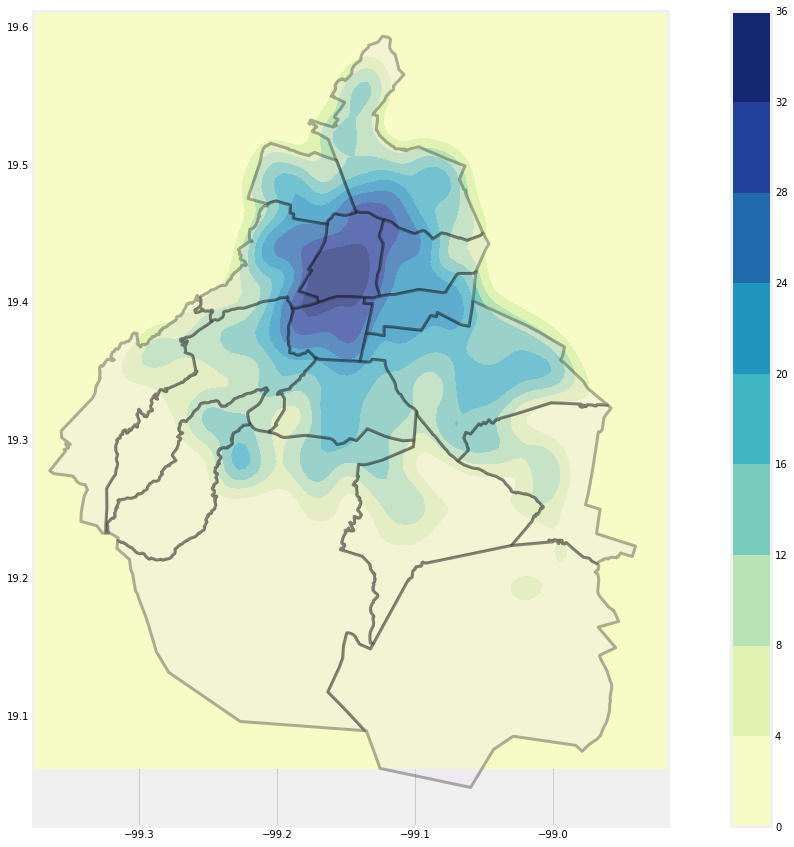

In [14]:
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.kdeplot(real.geometry.x, real.geometry.y, cbar = True, cmap = 'YlGnBu', shade = True, edgecolor = 'black',ax = ax)
alcaldias.plot(ax = ax, alpha = 0.3, color = '#ece2f0', edgecolor = 'black', linewidth = 3)
#fig.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/final_datasets/den_real.png', format = 'png', dpi = 200, bbox_inches = 'tight')


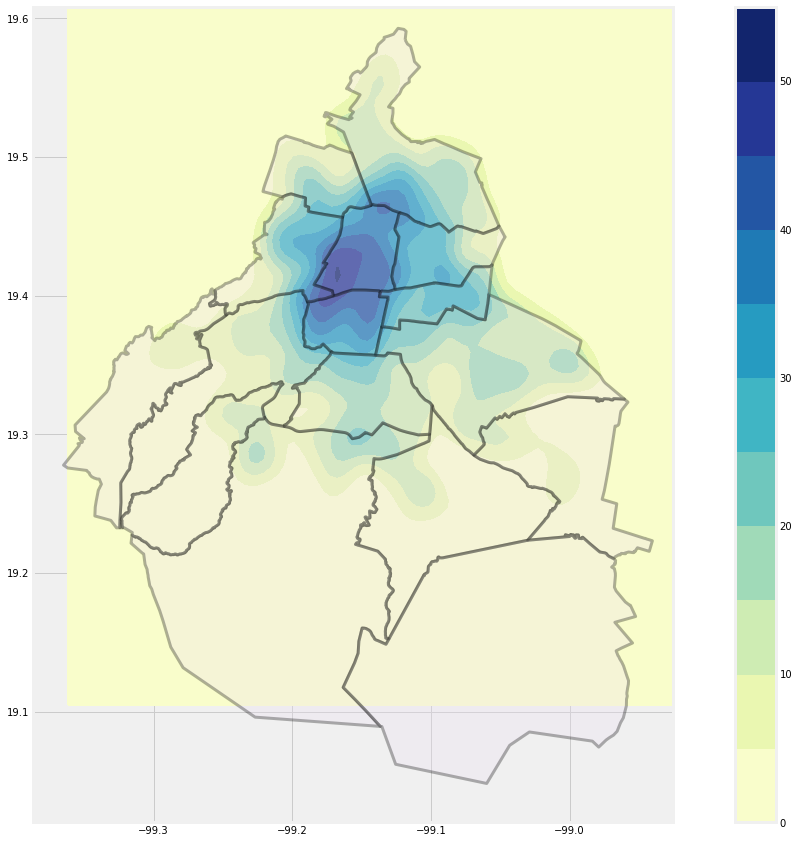

In [15]:
fig, ax = plt.subplots(figsize=(20, 15))

ax = sns.kdeplot(pred.geometry.x, pred.geometry.y, cbar = True, cmap = 'YlGnBu', shade = True, edgecolor = 'black',ax = ax)
alcaldias.plot(ax = ax, alpha = 0.3, color = '#ece2f0', edgecolor = 'black', linewidth = 3)
#cbar = ax.collections[0].colorbar
#cbar.set_ticks([0,10,20,30,40,50,60])
#fig.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/final_datasets/den_pred.png', format = 'png', dpi = 200, bbox_inches = 'tight')

In [16]:
real_n = gdf_clean[gdf_clean['actual']==0]
pred_n = gdf_clean[gdf_clean['prediccion']==0]

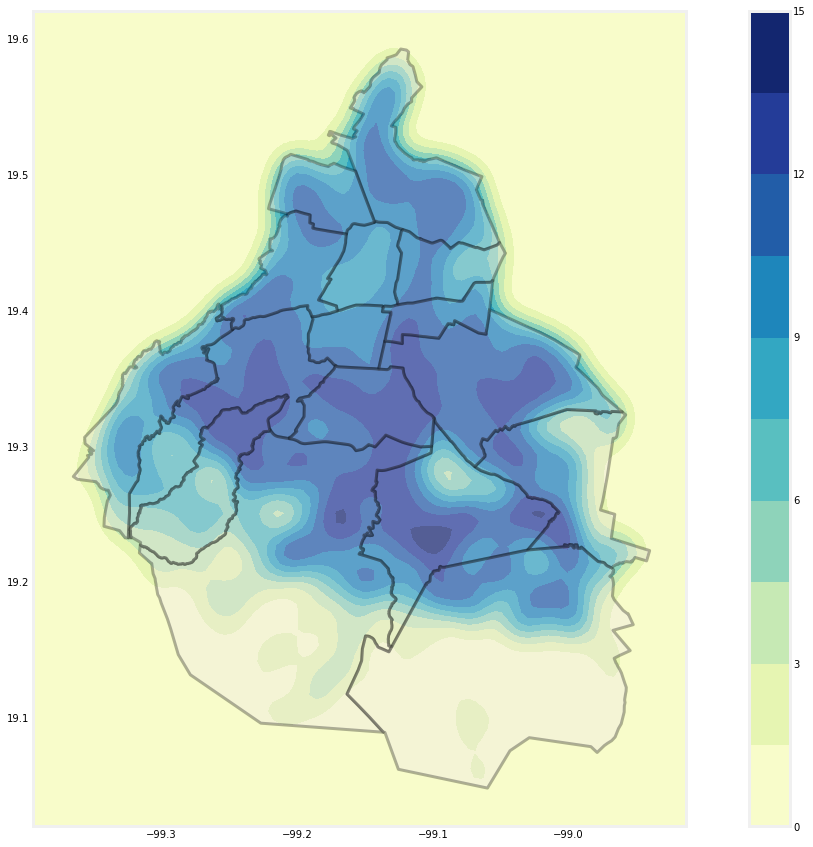

In [17]:
fig, ax = plt.subplots(figsize=(20, 15))

ax = sns.kdeplot(real_n.geometry.x, real_n.geometry.y, cbar = True, cmap = 'YlGnBu', shade = True, edgecolor = 'black',ax = ax)
alcaldias.plot(ax = ax, alpha = 0.3, color = '#ece2f0', edgecolor = 'black', linewidth = 3)
#fig.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/final_datasets/den_real_n.png', format = 'png', dpi = 200, bbox_inches = 'tight')


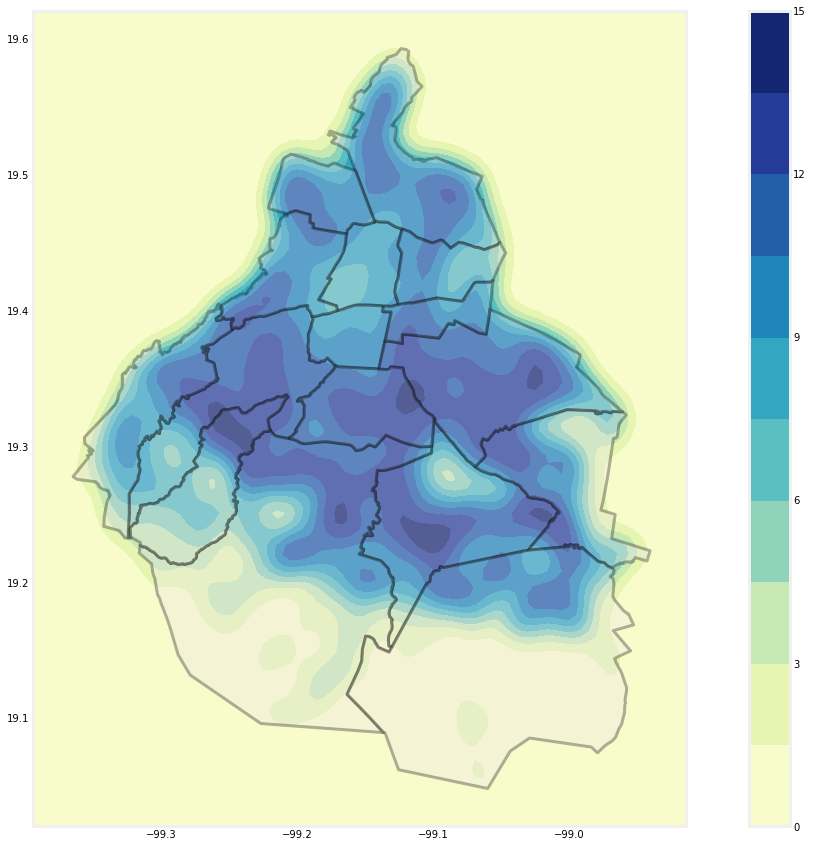

In [18]:
fig, ax = plt.subplots(figsize=(20, 15))

ax = sns.kdeplot(pred_n.geometry.x, pred_n.geometry.y, cbar = True, cmap = 'YlGnBu', shade = True, edgecolor = 'black',ax = ax)
alcaldias.plot(ax = ax, alpha = 0.3, color = '#ece2f0', edgecolor = 'black', linewidth = 3)
#fig.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/final_datasets/den_pred_n.png', format = 'png', dpi = 200, bbox_inches = 'tight')